In [2]:
ls

 Volume in drive C has no label.
 Volume Serial Number is D0C3-C0A2

 Directory of C:\Users\ARIFFATURRACHMAN\Documents\Python

04/12/2020  22:25    <DIR>          .
04/12/2020  22:25    <DIR>          ..
04/12/2020  18:45    <DIR>          .ipynb_checkpoints
04/12/2020  18:49       180.689.752 best_weight_scene_mobileNet.h5
16/09/2020  23:15         1.329.062 coba.jpg
14/10/2019  09:03            69.064 forest_coba.jpg
04/12/2020  16:28    <DIR>          ImageDir
04/12/2020  19:01    <DIR>          ImageDir1
04/12/2020  21:55         4.961.032 nnmodel_scene
04/12/2020  18:59           246.504 Pertemuan10_Arif_Faturrachman_1101194103.ipynb
04/12/2020  22:25           139.126 Tugas11_Arif_Faturrachman.ipynb
               6 File(s)    187.434.540 bytes
               5 Dir(s)  70.359.056.384 bytes free


In [3]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

Using TensorFlow backend.


In [4]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("ImageDir1")
data = []
labels = []

[INFO] loading images...


In [5]:
# loop over our input images
for imagePath in imagePaths:
    # load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [6]:
print(labels)

['GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01', 'GMB_01',

In [7]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [8]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]]


In [9]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(147, 64, 64, 3)


In [10]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               313700    
_________________________________________________________________
dense_2 (Dense)              (None, 5)                

In [11]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64,64,3)),
        Dense(100, activation="relu", name="layer1"),
        Dense(50, activation="relu", name="layer2"),
        Dense(25, activation="relu", name="layer3"),
        Dense(5, activation = "softmax", name="layer4"),
    ]
)

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 50)                5050      
_________________________________________________________________
layer3 (Dense)               (None, 25)                1275      
_________________________________________________________________
layer4 (Dense)               (None, 5)                 130       
Total params: 1,235,355
Trainable params: 1,235,355
Non-trainable params: 0
_________________________________________________________________


In [13]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [14]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Train on 438 samples, validate on 147 samples
Epoch 1/25
438/438 [==============================] - 2s 4ms/step - loss: 1.6092 - accuracy: 0.2352 - val_loss: 1.5275 - val_accuracy: 0.2177
Epoch 2/25
438/438 [==============================] - 1s 3ms/step - loss: 1.4503 - accuracy: 0.3995 - val_loss: 1.3165 - val_accuracy: 0.4422
Epoch 3/25
438/438 [==============================] - 2s 3ms/step - loss: 1.1716 - accuracy: 0.5228 - val_loss: 1.0099 - val_accuracy: 0.6122
Epoch 4/25
438/438 [==============================] - 2s 3ms/step - loss: 1.0176 - accuracy: 0.5959 - val_loss: 0.9465 - val_accuracy: 0.5986
Epoch 5/25
438/438 [==============================] - 1s 3ms/step - loss: 0.8665 - accuracy: 0.6963 - val_loss: 0.9620 - val_accuracy: 0.6190
Epoch 6/25
438/438 [==============================] - 2s 4ms/step - loss: 0.7971 - accuracy: 0.7237 - val_loss: 0.9006 - val_accuracy: 0.6531
Epoch 7/25
438/438 [==============================] - 2s 3ms/step - loss: 0.6808 - accuracy: 0.7671 - 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


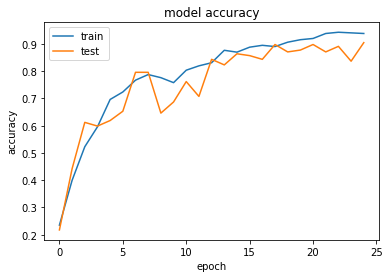

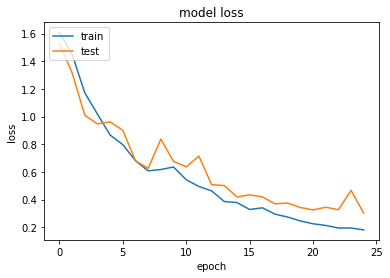

In [15]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.91      0.91      0.91        32
      GMB_03       0.89      0.94      0.91        34
      GMB_05       0.92      0.96      0.94        24
      GMB_07       0.81      0.79      0.80        28
      GMB_09       1.00      0.93      0.96        29

    accuracy                           0.90       147
   macro avg       0.91      0.90      0.90       147
weighted avg       0.91      0.90      0.90       147



In [17]:
model.save('nnmodel_scene')

In [18]:
import cv2
import matplotlib.pyplot as plt
image1='coba.jpg'

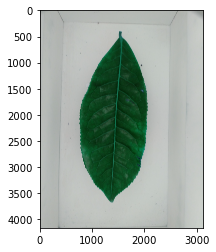

In [19]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
#print(type(img_array))

In [20]:
image_testing = Image.open('coba.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
print(image_testing.shape)

(64, 64, 3)


In [21]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [22]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.19836594 0.18489572 0.08438235 0.16765648 0.3646995 ]]
['GMB_09']
